In [1]:
#Import libraries
import pytz
import numpy as np
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas_ta as ta
import MetaTrader5 as mt5
from datetime import datetime, timedelta, time
from tensorflow.keras.models import save_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score

c:\Users\Angel\anaconda3\envs\proyect4\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (2.2.2) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
c:\Users\Angel\anaconda3\envs\proyect4\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Initialize connection to the MetaTrader 5 terminal
if mt5.initialize():
    # Replace with your login credentials
    mt5.login(login=51863590, server="ICMarketsSC-Demo", password="1lfz&CJ7jyX2N8")
    timezone = pytz.timezone("America/Bogota")
    symbol_1 = "ETHUSD"
    symbol_2 = "AMZN.NAS"
    symbol_3 = "TSLA.NAS"
    symbol_4 = "XAUUSD"
    now = datetime.now(tz=timezone)
    # Retrieve monthly, weekly, and daily data
    a = mt5.copy_rates_range(symbol_1, mt5.TIMEFRAME_M15, datetime(2018, 1, 1), now)
    b = mt5.copy_rates_range(symbol_1, mt5.TIMEFRAME_M5, datetime(2023, 1, 1), now) #datetime(2024, 6, 1)
    c = mt5.copy_rates_range(symbol_1, mt5.TIMEFRAME_M1, datetime(2017, 5, 1), now) #20% MORE of rows as we'll try to predict 20%
    # Create DataFrames
    df_a = pd.DataFrame(a)
    df_b = pd.DataFrame(b)
    df_c = pd.DataFrame(c)
    #Truncate the data
    lenght_1 = len(df_a)
    df_b = df_b.tail(lenght_1)
    # df_1 = df_1.tail(lenght)
    #Create the RSI and EMA during a timestamp of 15 dayd and 22 days respectivelly
    # Calculate RSI and EMA
    df_a['rsi'] = ta.rsi(df_a['close'], length=8)
    df_a['ema'] = ta.ema(df_a['close'], length=22)
    df_b['rsi'] = ta.rsi(df_b['close'], length=8)
    df_b['ema'] = ta.ema(df_b['close'], length=22)
    df_c['rsi'] = ta.rsi(df_c['close'], length=8)
    df_c['ema'] = ta.ema(df_c['close'], length=22)
    # Fill NaN values
    df_a['rsi'].fillna(df_a['rsi'].mean(), inplace=True)
    df_a['ema'].fillna(df_a['ema'].mean(), inplace=True)
    df_b['rsi'].fillna(df_b['rsi'].mean(), inplace=True)
    df_b['ema'].fillna(df_b['ema'].mean(), inplace=True)
    df_c['rsi'].fillna(df_c['rsi'].mean(), inplace=True)
    df_c['ema'].fillna(df_c['ema'].mean(), inplace=True)

    # Retrieve monthly, weekly, and daily data
    x = mt5.copy_rates_range(symbol_2, mt5.TIMEFRAME_M15, datetime(2018, 1, 1), now)
    y = mt5.copy_rates_range(symbol_2, mt5.TIMEFRAME_M5, datetime(2023, 1, 1), now) #datetime(2024, 6, 1)
    w = mt5.copy_rates_range(symbol_2, mt5.TIMEFRAME_M1, datetime(2020, 5, 1), now) #20% MORE of rows as we'll try to predict 20%
    # Create DataFrames
    df_x = pd.DataFrame(x)
    df_y = pd.DataFrame(y)
    df_w = pd.DataFrame(w)
    #Truncate the data
    lenght = len(df_x)
    df_y = df_y.tail(lenght)
    # df_1 = df_1.tail(lenght)
    #Create the RSI and EMA during a timestamp of 15 dayd and 22 days respectivelly
    # Calculate RSI and EMA
    df_x['rsi'] = ta.rsi(df_x['close'], length=8)
    df_x['ema'] = ta.ema(df_x['close'], length=22)
    df_y['rsi'] = ta.rsi(df_y['close'], length=8)
    df_y['ema'] = ta.ema(df_y['close'], length=22)
    df_w['rsi'] = ta.rsi(df_w['close'], length=8)
    df_w['ema'] = ta.ema(df_w['close'], length=22)
    # Fill NaN values
    df_x['rsi'].fillna(df_x['rsi'].mean(), inplace=True)
    df_x['ema'].fillna(df_x['ema'].mean(), inplace=True)
    df_y['rsi'].fillna(df_y['rsi'].mean(), inplace=True)
    df_y['ema'].fillna(df_y['ema'].mean(), inplace=True)
    df_w['rsi'].fillna(df_w['rsi'].mean(), inplace=True)
    df_w['ema'].fillna(df_w['ema'].mean(), inplace=True)

    # Retrieve monthly, weekly, and daily data
    d = mt5.copy_rates_range(symbol_3, mt5.TIMEFRAME_M15, datetime(2018, 1, 1), now)
    t = mt5.copy_rates_range(symbol_3, mt5.TIMEFRAME_M5, datetime(2023, 1, 1), now) #datetime(2024, 6, 1)
    u = mt5.copy_rates_range(symbol_3, mt5.TIMEFRAME_M1, datetime(2020, 5, 1), now) #20% MORE of rows as we'll try to predict 20%
    # Create DataFrames
    df_d = pd.DataFrame(d)
    df_t = pd.DataFrame(t)
    df_u = pd.DataFrame(u)
    #Truncate the data
    lenght_2 = len(df_d)
    df_t = df_t.tail(lenght_2)
    # df_1 = df_1.tail(lenght)
    #Create the RSI and EMA during a timestamp of 15 dayd and 22 days respectivelly
    # Calculate RSI and EMA
    df_d['rsi'] = ta.rsi(df_d['close'], length=8)
    df_d['ema'] = ta.ema(df_d['close'], length=22)
    df_t['rsi'] = ta.rsi(df_t['close'], length=8)
    df_t['ema'] = ta.ema(df_t['close'], length=22)
    df_u['rsi'] = ta.rsi(df_u['close'], length=8)
    df_u['ema'] = ta.ema(df_u['close'], length=22)
    # Fill NaN values
    df_d['rsi'].fillna(df_d['rsi'].mean(), inplace=True)
    df_d['ema'].fillna(df_d['ema'].mean(), inplace=True)
    df_t['rsi'].fillna(df_t['rsi'].mean(), inplace=True)
    df_t['ema'].fillna(df_t['ema'].mean(), inplace=True)
    df_u['rsi'].fillna(df_u['rsi'].mean(), inplace=True)
    df_u['ema'].fillna(df_u['ema'].mean(), inplace=True)

    j = mt5.copy_rates_range(symbol_4, mt5.TIMEFRAME_M15, datetime(2018, 1, 1), now)
    k = mt5.copy_rates_range(symbol_4, mt5.TIMEFRAME_M5, datetime(2023, 1, 1), now) #datetime(2024, 6, 1)
    l = mt5.copy_rates_range(symbol_4, mt5.TIMEFRAME_M1, datetime(2020, 5, 1), now) #20% MORE of rows as we'll try to predict 20%
    # Create DataFrames
    df_j = pd.DataFrame(j)
    df_k = pd.DataFrame(k)
    df_l = pd.DataFrame(l)
    #Truncate the data
    lenght_3 = len(df_j)
    df_k = df_t.tail(lenght_3)
    # df_1 = df_1.tail(lenght)
    #Create the RSI and EMA during a timestamp of 15 dayd and 22 days respectivelly
    # Calculate RSI and EMA
    df_j['rsi'] = ta.rsi(df_j['close'], length=8)
    df_j['ema'] = ta.ema(df_j['close'], length=22)
    df_k['rsi'] = ta.rsi(df_k['close'], length=8)
    df_k['ema'] = ta.ema(df_k['close'], length=22)
    df_l['rsi'] = ta.rsi(df_l['close'], length=8)
    df_l['ema'] = ta.ema(df_l['close'], length=22)
    # Fill NaN values
    df_j['rsi'].fillna(df_j['rsi'].mean(), inplace=True)
    df_j['ema'].fillna(df_j['ema'].mean(), inplace=True)
    df_k['rsi'].fillna(df_k['rsi'].mean(), inplace=True)
    df_k['ema'].fillna(df_k['ema'].mean(), inplace=True)
    df_l['rsi'].fillna(df_l['rsi'].mean(), inplace=True)
    df_l['ema'].fillna(df_l['ema'].mean(), inplace=True)

    # Concatenate vertically
    df = pd.concat([df_c], ignore_index=True)
    columns_to_drop = ['spread', 'time', 'real_volume']
    df.drop(columns=columns_to_drop, inplace=True)
    #mt5.shutdown()
    # Now df_combined contains the concatenated data
    print(df.head(10))
    print(df.tail(10))
    print(len(df))
else:
    print("Failed to initialize MetaTrader 5.")

Num GPUs Available:  1


C:\Users\Angel\AppData\Local\Temp\ipykernel_2100\402867568.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_a['rsi'].fillna(df_a['rsi'].mean(), inplace=True)
C:\Users\Angel\AppData\Local\Temp\ipykernel_2100\402867568.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

    open   high    low  close  tick_volume        rsi          ema
0  72.55  75.70  70.80  74.61        13095  50.270958  2296.604393
1  74.98  75.89  72.00  73.06        12521  50.270958  2296.604393
2  73.06  86.45  73.06  79.37        12562  50.270958  2296.604393
3  79.36  91.11  78.93  84.12        15601  50.270958  2296.604393
4  88.84  89.66  84.02  86.34        14137  50.270958  2296.604393
5  86.34  87.00  75.00  82.10        16136  50.270958  2296.604393
6  82.10  86.37  79.00  82.01        13203  50.270958  2296.604393
7  82.01  86.60  81.68  84.72        14896  50.270958  2296.604393
8  84.72  89.85  81.89  83.50        12623  65.362175  2296.604393
9  84.93  91.23  84.50  87.00        13047  73.199300  2296.604393
            open     high      low    close  tick_volume        rsi  \
1974293  2450.71  2453.07  2450.70  2452.97          246  66.530833   
1974294  2452.87  2454.42  2452.23  2452.67          153  64.854649   
1974295  2452.67  2454.37  2452.10  2453.24       

C:\Users\Angel\AppData\Local\Temp\ipykernel_2100\402867568.py:116: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_j['rsi'].fillna(df_j['rsi'].mean(), inplace=True)
C:\Users\Angel\AppData\Local\Temp\ipykernel_2100\402867568.py:117: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [7]:
#Create a test set
scaler = MinMaxScaler(feature_range=(0, 1))
# test = df['close'].tail(73368) #Number of minutes we're looking to predict for two months depending on the Market
# test_scaled = scaler.fit_transform(test.values.reshape((-1, 1)))
#Scale the train data
# train = df.head(len(df) - len(test)) #Rows we want to use to predict the data: total number of rows - minutes we want to predict
train_scaled = scaler.fit_transform(df.values.reshape((-1, 1)))
#Scale the test data
def create_dataset(dataset, N=60):
    X, Y = [], []
    for i in range(len(dataset) - N):
        X.append(dataset[i:(i + N)])
        Y.append(dataset[i + N, -1])
    return np.array(X), np.array(Y)
# Apply the new function
N = 60
X_train, y_train = create_dataset(train_scaled, N)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = y_train.reshape(-1, 1) #np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #y_train.reshape(-1, 1)
print("Train shapes for X and y respectivelly", X_train.shape, y_train.shape)
print("Train sizes for X and y respectivelly", X_train.size, y_train.size)
print('Full time Lenght', len(df))

Train shapes for X and y respectivelly (13820061, 60, 1) (13820061, 1)
Train sizes for X and y respectivelly 829203660 13820061
Full time Lenght 1974303


In [8]:
from keras.utils import plot_model #9446 Parameters, is the best
#Create the model (Optimized)
model = Sequential()
model.add(LSTM(30, recurrent_activation='sigmoid', activation='tanh', return_sequences=True, recurrent_dropout=0, unroll=False, use_bias=True, input_shape=(N, 1))) #(X_train.shape[1], 1) also works fine
model.add(Dropout(0.2))
model.add(LSTM(25, recurrent_activation='sigmoid', activation='tanh', return_sequences=True, recurrent_dropout=0, unroll=False, use_bias=True))
model.add(Dropout(0.2))
model.add(LSTM(20, recurrent_activation='sigmoid', activation='tanh', return_sequences=True, recurrent_dropout=0, unroll=False, use_bias=True))
model.add(Dropout(0.2))
# model.add(LSTM(20, recurrent_activation='sigmoid', activation='tanh', return_sequences=True, recurrent_dropout=0, unroll=False, use_bias=True))
# model.add(Dropout(0.2))
# model.add(LSTM(10, recurrent_activation='sigmoid', activation='tanh', return_sequences=True, recurrent_dropout=0, unroll=False, use_bias=True))
# model.add(Dropout(0.2))
# model.add(LSTM(25, recurrent_activation='sigmoid', activation='tanh', return_sequences=True, recurrent_dropout=0, unroll=False, use_bias=True))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()
# dot_img_file = '/tmp/model_image.png'
# plot_model(model, to_file=dot_img_file, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 30)            3840      
                                                                 
 dropout_3 (Dropout)         (None, 60, 30)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 25)            5600      
                                                                 
 dropout_4 (Dropout)         (None, 60, 25)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 20)            3680      
                                                                 
 dropout_5 (Dropout)         (None, 60, 20)            0         
                                                                 
 dense_1 (Dense)             (None, 60, 1)            

In [9]:
#Compile the model 
model.compile(
    loss='mean_squared_error',
    optimizer=Adam(learning_rate=0.0001, clipvalue=1.0), 
    metrics=['mae', keras.metrics.RootMeanSquaredError()],
    run_eagerly=True
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)                                  
model.fit(X_train, y_train, epochs=15, batch_size=350, validation_split=0.2, callbacks=[early_stop])

Epoch 1/15
31589/31589 [==============================] - 1429s 45ms/step - loss: 1.8888e-05 - mae: 0.0032 - root_mean_squared_error: 0.0043 - val_loss: 2.6139e-05 - val_mae: 0.0046 - val_root_mean_squared_error: 0.0051
Epoch 2/15
31589/31589 [==============================] - 1396s 44ms/step - loss: 1.8764e-05 - mae: 0.0032 - root_mean_squared_error: 0.0043 - val_loss: 2.6246e-05 - val_mae: 0.0047 - val_root_mean_squared_error: 0.0051
Epoch 3/15
31589/31589 [==============================] - 1479s 47ms/step - loss: 1.8747e-05 - mae: 0.0032 - root_mean_squared_error: 0.0043 - val_loss: 2.6253e-05 - val_mae: 0.0047 - val_root_mean_squared_error: 0.0051
Epoch 4/15
31589/31589 [==============================] - 1477s 47ms/step - loss: 1.8730e-05 - mae: 0.0032 - root_mean_squared_error: 0.0043 - val_loss: 2.6246e-05 - val_mae: 0.0047 - val_root_mean_squared_error: 0.0051
Epoch 5/15
31589/31589 [==============================] - 1478s 47ms/step - loss: 1.8719e-05 - mae: 0.0032 - root_mean_s

In [12]:
from keras.utils import plot_model

# model_1 = keras.models.load_model(r"C:\Users\Angel\OneDrive\Escritorio\Vs Code\.vscode\Cyniska0.14.keras")
# model_1.summary()
#Save the Model
#save_model(model, 'Cyniska0.2.keras', overwrite=True)
# dot_img_file = '/tmp/model_image.png'
# plot_model(model_1, to_file=dot_img_file, show_shapes=True)

In [10]:
if mt5.initialize():
    # Replace with your login credentials
    mt5.login(login=51863590, server="ICMarketsSC-Demo", password="1lfz&CJ7jyX2N8")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 120, 30)           3840      
                                                                 
 dropout_7 (Dropout)         (None, 120, 30)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120, 25)           5600      
                                                                 
 dropout_8 (Dropout)         (None, 120, 25)           0         
                                                                 
 lstm_9 (LSTM)               (None, 120, 10)           1440      
                                                                 
 dropout_9 (Dropout)         (None, 120, 10)           0         
                                                                 
 dense_2 (Dense)             (None, 120, 1)           

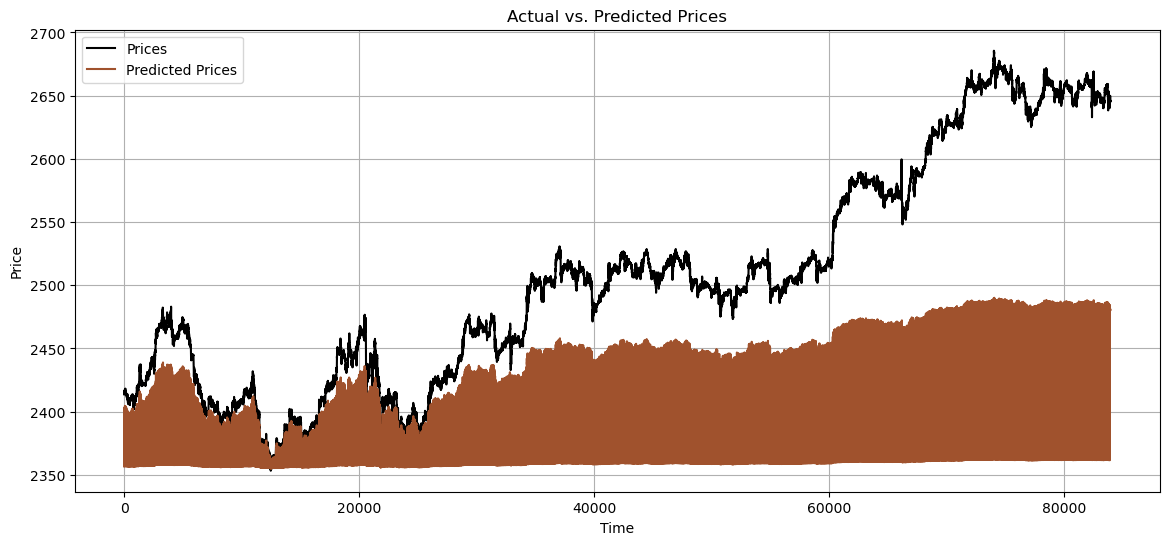

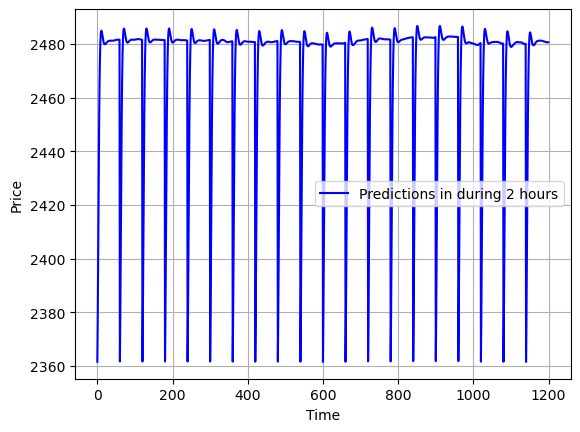

9037.195390147817
-0.19602175363448282


In [14]:
model_1 = keras.models.load_model(r"C:\Users\Angel\OneDrive\Escritorio\Vs Code\.vscode\Cyniska0.2.keras")
model_1.summary()
#CREATE A THE TEST DF
test = mt5.copy_rates_range('XAUUSD', mt5.TIMEFRAME_M1, datetime(2024, 6, 1), now)
test = pd.DataFrame(test)
test_1 = test['close'].tail(84000)
test_scaled = scaler.fit_transform(np.array(test_1).reshape(-1, 1))
_, X_test = create_dataset(test_scaled, N)
_, y_test = create_dataset(test_scaled, N)
#RESHAPE FOR PREDICTIONS
elements_two = X_test.size
divisible_two = (elements_two // 60) * 60
X_predict_shape = X_test[:divisible_two]
X_test = X_predict_shape.reshape(-1, 60, 1)

elements_one = y_test.size
divisible_one = (elements_one // 60) * 120
y_predict_shape = y_test[:divisible_one]
y_test = y_predict_shape.reshape(-1, 60, 1)

y_pred = model.predict(X_test)
# Inverse scaling
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_real = scaler.inverse_transform(y_test.reshape(-1, 1))
# y_pred_trimmed = y_pred[:len(y_real)] #Match the sizes
# y_real_trimmed = y_real[:len(y_pred)]
print("Test shapes for X and y respectivelly", X_test.shape, y_test.shape)
print("Test sizes for X and y respectivelly", X_test.size, y_test.size)
print(len(y_pred), y_pred.shape)
print(len(y_real), y_real.shape)
# Plot the results
now = datetime.now()
sixty_days = now + timedelta(days=60)
sixty_days = sixty_days.replace(microsecond=0)
date_range = pd.date_range(start=now.replace(microsecond=0), end=sixty_days, freq='1min')
date_range = date_range[date_range.dayofweek < 5]
time_df = pd.DataFrame(date_range)
rows = len(time_df)
print(f"Number of rows: {(rows)}")
plt.figure(figsize=(14, 6))
plt.plot(y_real, label='Prices', color='black')
plt.plot(y_pred, label='Predicted Prices', color='sienna')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.legend()
plt.show()
#PLot the predictions closer to see if the model is predicting good
plt.plot(y_pred[-1200:], color='blue', label='Predictions in during 2 hours')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()
min_length = min(len(y_real), len(y_pred))
y_real = y_real[:min_length]
y_pred =y_pred[:min_length]
print(mean_squared_error(y_true=y_real, y_pred=y_pred))
print(r2_score(y_true=y_real, y_pred=y_pred))